# Mini Project 2: Data Exploration and Engineering 

In [183]:
# import pandas for structuring the data
import pandas as pd
from prettytable import PrettyTable  # Ensure PrettyTable is imported

# import numpy for numerical analysis
import numpy as np

# import matplotlib for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline

# for generating random numbers
import random
import seaborn as sns


# the most important library for machine learning algorithms
from sklearn import datasets, svm, tree, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder



## Load the data

In [185]:
df = pd.read_csv('winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [186]:
df1 = pd.read_csv('winequality-white.csv', sep=";")

In [187]:
list(df)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [188]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [189]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [190]:


#, the original indices from the DataFrames being concatenated are ignored, and a new default integer index is created for the combined DataFrame.
 #adding a column to know which this info belongs to
df['wine_type'] = 'red'
df1['wine_type'] = 'white'
combine_df = pd.concat([df, df1], ignore_index="true")
combine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [191]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [192]:

#no mising values 
combine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

# Explore the data## 4. Explore the features of the original and the new files:

### finding rows and columns the "red" and "white" wine tables in the original copy 



In [195]:
df.shape


(1599, 13)

In [196]:
df1.shape

(4898, 13)

In [197]:
combine_df.shape

(6497, 13)

In [198]:
df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [199]:
df1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [200]:

#this function decribes how the values are disturbuted 
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


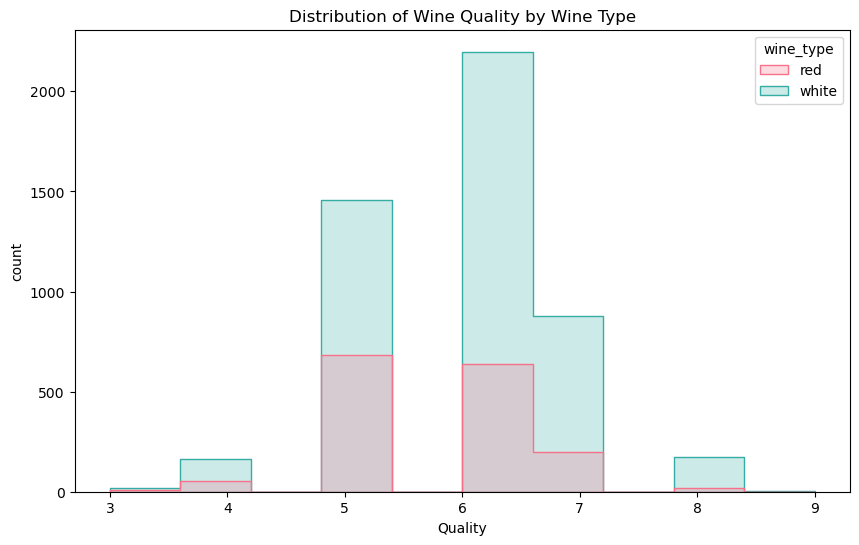

In [201]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combine_df, x='quality', hue='wine_type', bins=10, palette='husl', element='step', stat='count')
plt.title('Distribution of Wine Quality by Wine Type')
plt.xlabel('Quality')
plt.ylabel('count')
plt.show()

C:\Users\kalas\AppData\Local\Temp\ipykernel_2076\3267036912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combine_df, x='wine_type', y='quality', palette='husl')


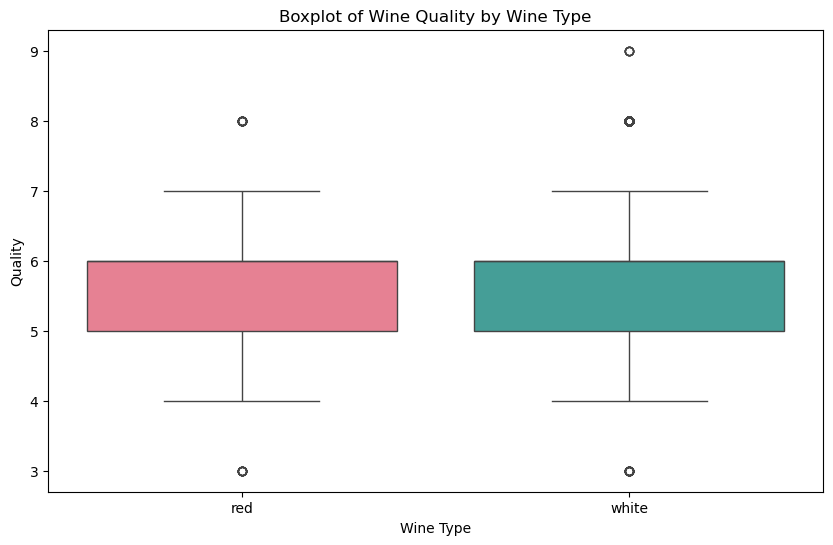

In [202]:



# pltting a boxplot to show the difference in quality between the red and white wine they have 
plt.figure(figsize=(10, 6))
sns.boxplot(data=combine_df, x='wine_type', y='quality', palette='husl')
plt.title('Boxplot of Wine Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.show()

C:\Users\kalas\AppData\Local\Temp\ipykernel_2076\3748223615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_alcohol, x='wine_type', y='alcohol', palette='husl')


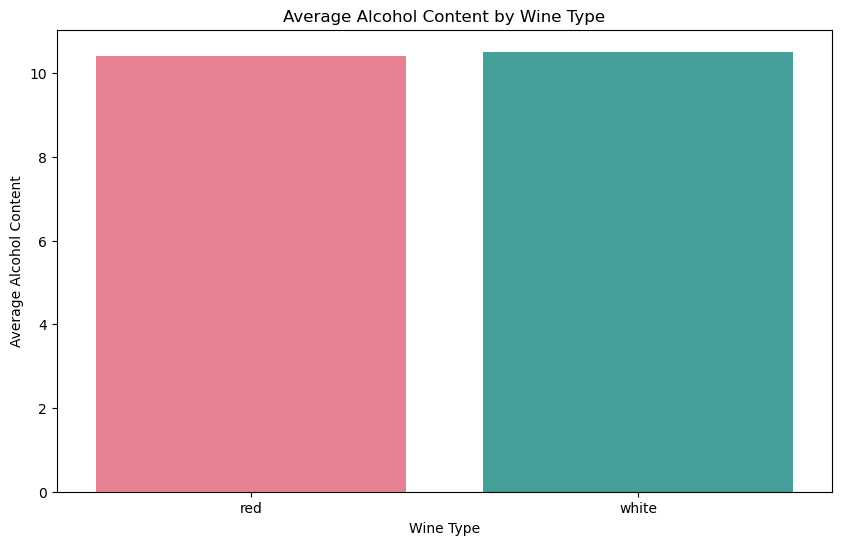

In [203]:
# Calculate the average alcohol content for each wine type
average_alcohol = combine_df.groupby('wine_type')['alcohol'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_alcohol, x='wine_type', y='alcohol', palette='husl')
plt.title('Average Alcohol Content by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Average Alcohol Content')
plt.show()


Text(0, 0.5, 'Quality')

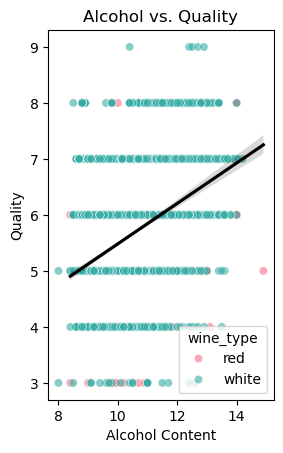

In [204]:
# adding a scatterplot to see if    the quantity of alcohol and residual sugar influence the quality of the wine, that's why a scatterplot would visualize it 

plt.subplot(1, 2, 1)
sns.scatterplot(data=combine_df, x='alcohol', y='quality', hue='wine_type', palette='husl', alpha=0.6)
sns.regplot(data=df, x='alcohol', y='quality', scatter=False, color='black')  # Regression line
plt.title('Alcohol vs. Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
# from what we observed , i tindicates that higher alcohol content is associated with higher wine quality.
# as we can see dots are everywhere so it means that wine is quality is not only affected by the alcohol content




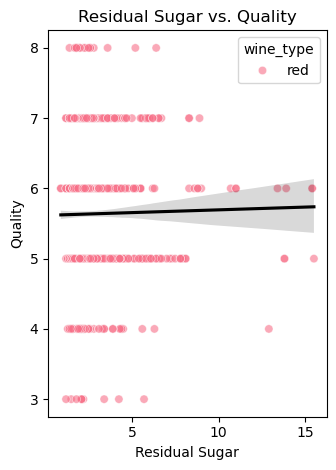

In [205]:
# plotting a scatter plot for Residual Sugar vs. Quality'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='residual sugar', y='quality', hue='wine_type', palette='husl', alpha=0.6)
sns.regplot(data=df, x='residual sugar', y='quality', scatter=False, color='black')  # Regression line
plt.title('Residual Sugar vs. Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')

plt.tight_layout()
plt.show()

#residual sugar dosent affect much the quality unlike the alochol conetent there is bit differece 

## 7. Which other questions might be of interest for the wine consumers and which of wine diturbuters ??


For Customers:
Quality Factors: Which wine characteristics (like acidity, alcohol content, etc.) are most linked to higher quality?
Price vs. Quality: Does paying more mean the wine has better quality?
Health Impact: Does residual sugar in wine affect its health benefits?
For Distributors:
Sales Trends: Which wines sell the most in different regions?
Production & Quality: Which production methods result in the highest quality wines?
Pricing Strategy: What is the optimal price point that maximizes both sales and quality?

Split the aggregated data into five subsets by binning the attribute pH. Which subset has highest
density? What if you split the data in ten subsets?##

## 8. 
Split the aggregated data into five subsets by binning the attribute pH. Which subset has highest
density? What if you split the data in ten subsets?

In [210]:
# first we add a new column , and we name it ph_5_bins, then we use panda library and we cut the continuous data into 5 intervals 
df['pH_5_bins'] = pd.cut(df['pH'], bins=5)
density_by_5_bins = df.groupby('pH_5_bins')['density'].mean()
print("Density by 5 bins:")
print(density_by_5_bins)



Density by 5 bins:
pH_5_bins
(2.739, 2.994]    0.998095
(2.994, 3.248]    0.997475
(3.248, 3.502]    0.996510
(3.502, 3.756]    0.995749
(3.756, 4.01]     0.993287
Name: density, dtype: float64


C:\Users\kalas\AppData\Local\Temp\ipykernel_2076\2581610564.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_by_5_bins = df.groupby('pH_5_bins')['density'].mean()


In [211]:
df['pH_10_bins'] = pd.cut(df['pH'], bins=10)

# Group by these bins and calculate the mean density for each bin
density_by_10_bins = df.groupby('pH_10_bins')['density'].mean()
print("\nDensity by 10 bins:")
print(density_by_10_bins)


Density by 10 bins:
pH_10_bins
(2.739, 2.867]    1.000200
(2.867, 2.994]    0.997939
(2.994, 3.121]    0.997864
(3.121, 3.248]    0.997331
(3.248, 3.375]    0.996618
(3.375, 3.502]    0.996339
(3.502, 3.629]    0.995946
(3.629, 3.756]    0.994848
(3.756, 3.883]    0.994117
(3.883, 4.01]     0.992665
Name: density, dtype: float64


C:\Users\kalas\AppData\Local\Temp\ipykernel_2076\247300174.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_by_10_bins = df.groupby('pH_10_bins')['density'].mean()


C:\Users\kalas\AppData\Local\Temp\ipykernel_2076\550349330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=binned_data, x='pH_5_bins', y='Average Density', palette='viridis')# palette is used to choose the color and virdius colors that varies from


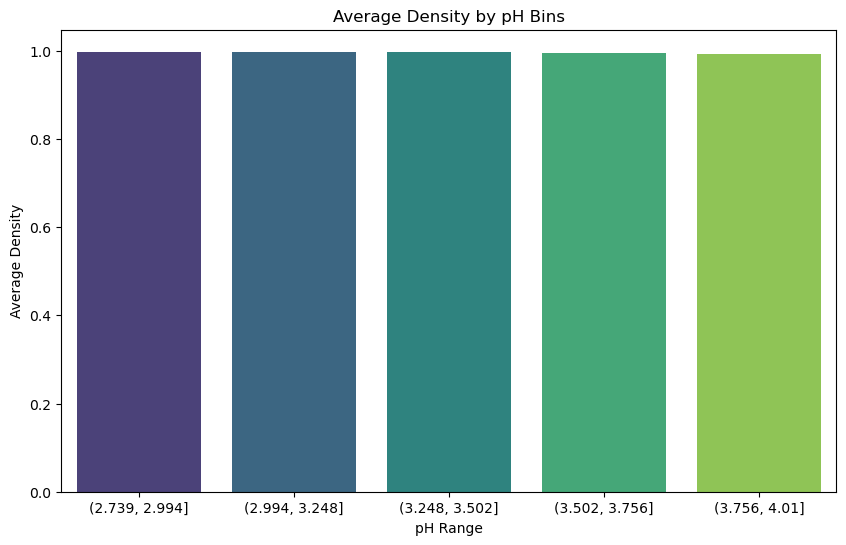

In [212]:
binned_data = density_by_5_bins.reset_index() # rest index is used to spearte our result which are ph and density into 32 column 
binned_data.columns = ['pH_5_bins', 'Average Density']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=binned_data, x='pH_5_bins', y='Average Density', palette='viridis')# palette is used to choose the color and virdius colors that varies from
# pruple to uyellow 
plt.title('Average Density by pH Bins')
plt.xlabel('pH Range')
plt.ylabel('Average Density')
plt.show()

C:\Users\kalas\AppData\Local\Temp\ipykernel_2076\1755696921.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=binned_data_10, x='pH_10_bins', y='Average Density', palette='viridis')


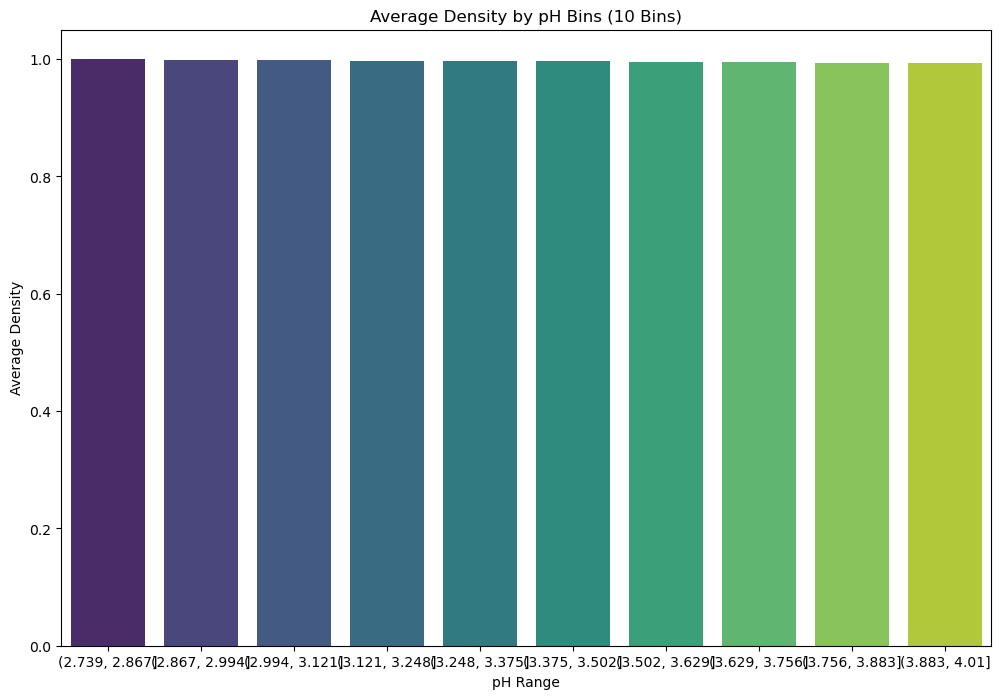

In [213]:
binned_data_10 = density_by_10_bins.reset_index()
binned_data_10.columns = ['pH_10_bins', 'Average Density']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=binned_data_10, x='pH_10_bins', y='Average Density', palette='viridis')
plt.title('Average Density by pH Bins (10 Bins)')
plt.xlabel('pH Range')
plt.ylabel('Average Density')
plt.show()


In [214]:
### Analysis of pH and Density: The analysis of wine data, divided into 10 pH bins, indicates a general trend where the average density of wines tends to decrease as the pH increases. This suggests that pH levels can have a slight but noticeable effect on the density of wine.

## 8. Create a heat map or a correlation matrix of all data and investigate it.d?

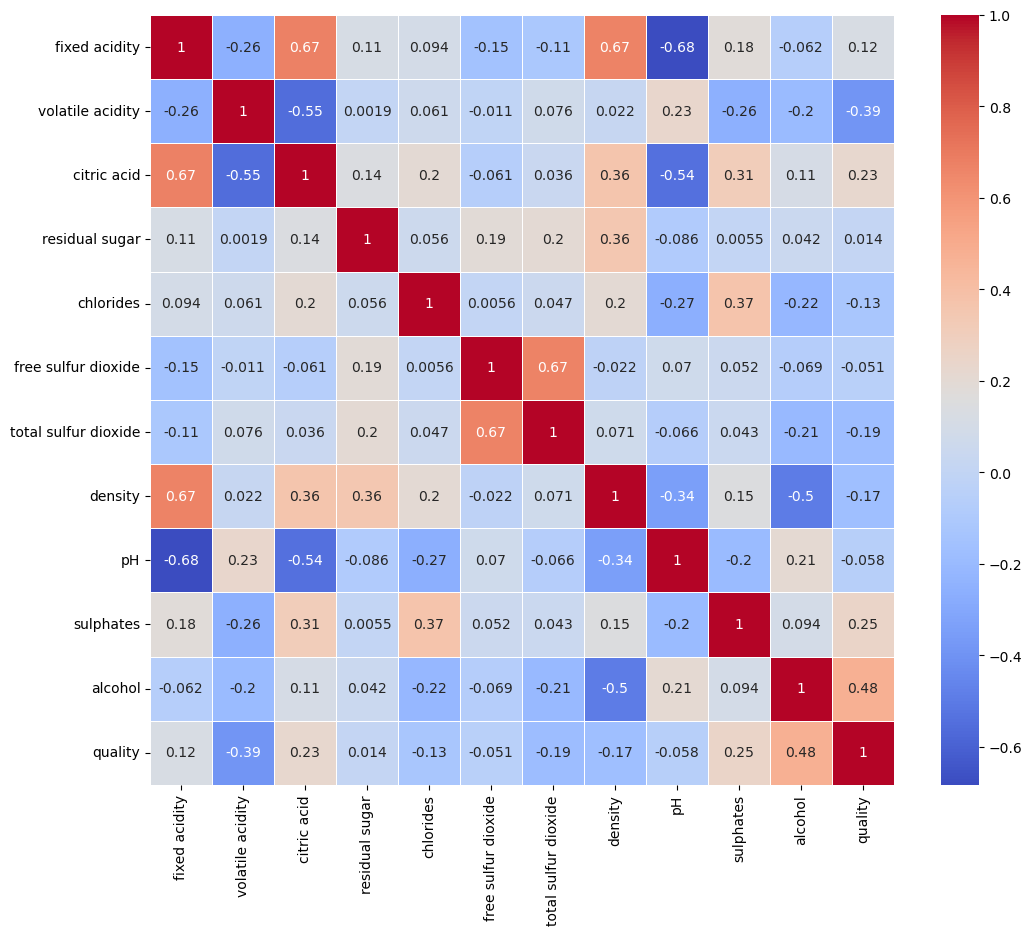

In [216]:
# red wine heatmap
ndf = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = ndf.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=0.5)  # Adjust settings

plt.show()

Wine quality has a positive correlation with alcohol content (0.48), indicating that higher alcohol content is associated with better wine quality. Conversely, volatile acidity has a negative impact on wine quality, suggesting that higher volatile acidity is associated with lower wine quality. Additionally, fixed acidity is positively correlated with citric acid, meaning that as the amount of fixed acidity increases, the amount of citric acid also tends to increase

##  Do you get the same correlation results when you analyze the red and the white wine data sets
separately?

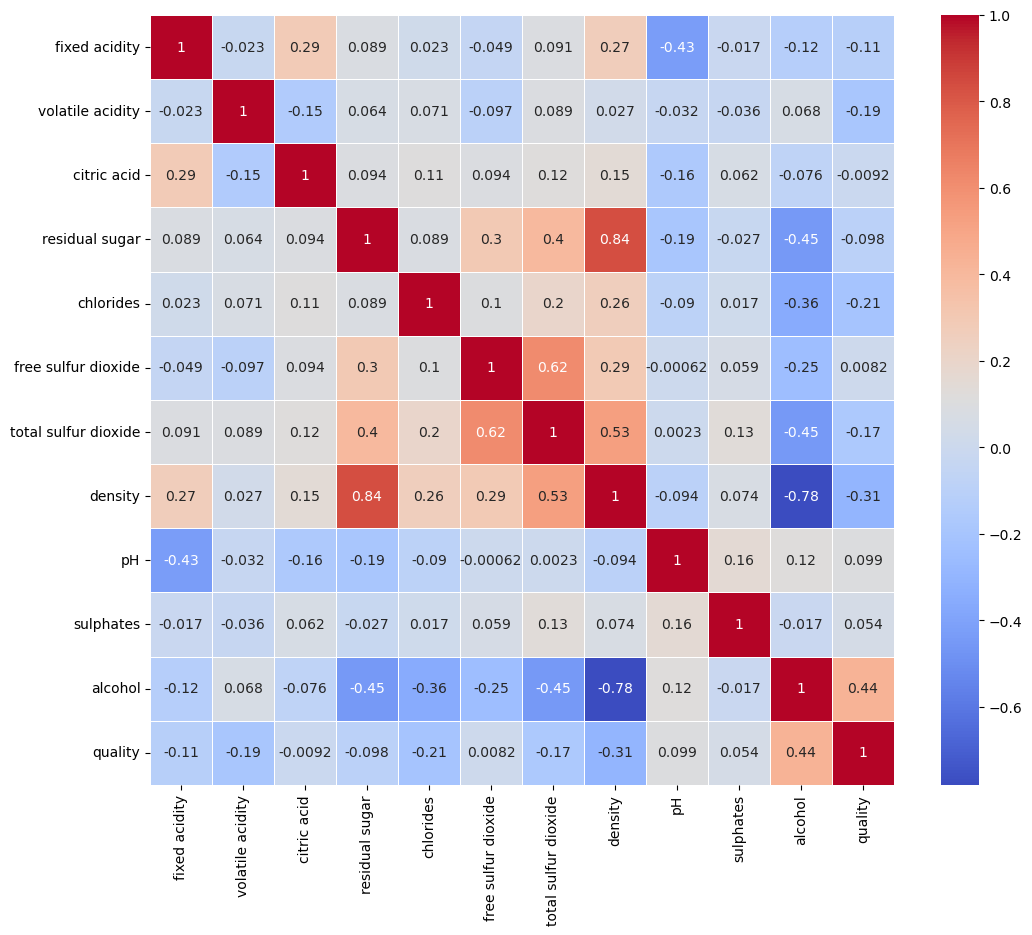

In [219]:
# heatmap for white wine 
ndf1 = df1.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = ndf1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=0.5)  # Adjust settings

plt.show()

In [220]:
# In both heatmaps,
#alcohol content is positively correlated with wine quality for both white and red wines, indicating that
#higher alcohol content generally improves wine quality. However, there are differences between white and red wines in
#terms of other attributes affecting quality. For white wines, density negatively impacts wine quality, suggesting that higher 
#density is associated with lower quality. In contrast, for red wines, volatile acidity has a negative effect on wine quality, meaning that higher 
#volatile acidity is linked to lower quality.

# Prepare the data for further analysis

In [222]:
print(df['residual sugar'].describe())


count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


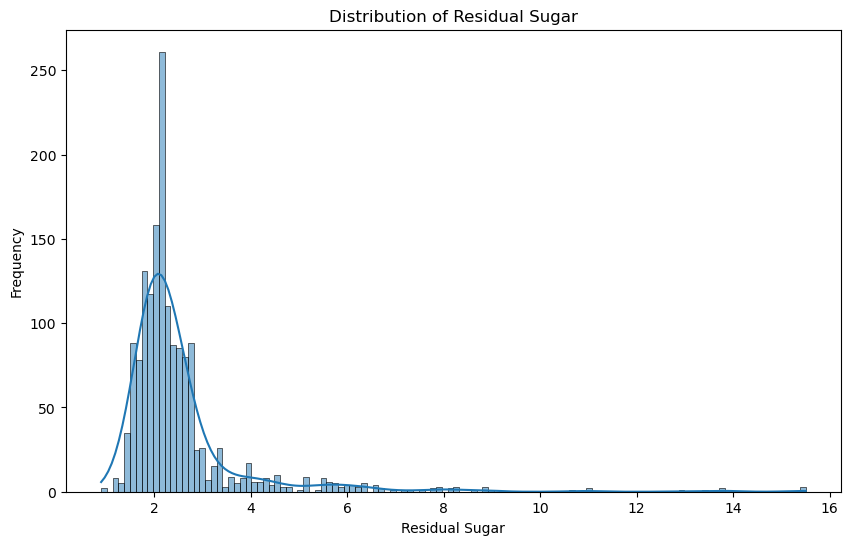

In [223]:
plt.figure(figsize=(10, 6))
sns.histplot(df['residual sugar'], kde=True)
plt.title('Distribution of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

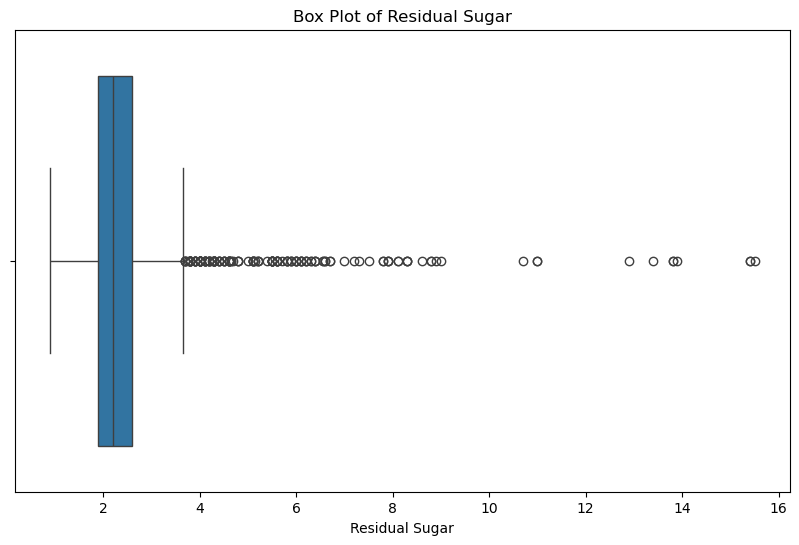

In [224]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['residual sugar'])
plt.title('Box Plot of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.show()


In [225]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)

# Calculate Interquartile Range (IQR)   
IQR = Q3 - Q1

# Define outlier everthing above the number or greater will be considered as an oultier 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
(lower_bound,upper_bound)


(0.8499999999999996, 3.6500000000000004)

In [226]:
# now by listing the number that are greater and lower than lower bound and uppper ,we can identify easily the ouliers
outliers = df[(df['residual sugar'] < lower_bound) | (df['residual sugar'] > upper_bound)]
print(outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
18              7.4             0.590         0.08             4.4      0.086   
...             ...               ...          ...             ...        ...   
1552            6.3             0.680         0.01             3.7      0.103   
1558            6.9             0.630         0.33             6.7      0.235   
1574            5.6             0.310         0.78            13.9      0.074   
1577            6.2             0.700         0.15             5.1      0.076   
1589            6.6             0.725         0.20             7.8      0.073   

      free sulfur dioxide  

In [227]:
#now we want to remove the ouliers 
df_no_outliers = df[(df['residual sugar'] > lower_bound) & (df['residual sugar'] < upper_bound)]
df_no_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,pH_5_bins,pH_10_bins
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(3.502, 3.756]","(3.502, 3.629]"
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,"(2.994, 3.248]","(3.121, 3.248]"
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,"(3.248, 3.502]","(3.248, 3.375]"
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,"(2.994, 3.248]","(3.121, 3.248]"
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(3.502, 3.756]","(3.502, 3.629]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,"(3.248, 3.502]","(3.375, 3.502]"
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,"(3.502, 3.756]","(3.502, 3.629]"
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,"(3.248, 3.502]","(3.375, 3.502]"
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,"(3.502, 3.756]","(3.502, 3.629]"


### 12. Remove the attributes with the lowest correlation to the wine quality and any one highly 
correlated to another independent attribute.

In [229]:
target_corr = corrmat['quality']
lowest_corr_features = target_corr.nsmallest(2).index.tolist() # getting the 2 feature with the lowest correlation with(2 numbers)
lowest_corr_features

['density', 'chlorides']

In [230]:
import pandas as pd
import numpy as np

ndf1 = combine_df.select_dtypes(include=[np.number])
# Compute the correlation matrix
corrmat = ndf1.corr()

# Define a threshold for high correlation
threshold = 0.4
# Step 1: Identify features with the lowest correlation to 'wine quality'
target_corr = corrmat['quality']
lowest_corr_features = target_corr.nsmallest(2).index.tolist()  # Get the 2 features with lowest correlation

# Step 2: Identify highly correlated features
highly_corr_features = set()

for col in corrmat.columns:
    # Select the correlations for the current column
    high_corr = corrmat[abs(corrmat[col]) > threshold].index  # we use abs becvause we need both number with minus and plus because indicatestrong correrlation

    # Add highly correlated features to the set (excluding self-correlation)
    highly_corr_features.update(high_corr)

# Remove self-correlation and features that are already in the lowest correlation list
features_to_remove = set(lowest_corr_features) | highly_corr_features

# Drop features from the DataFrame
df_cleaned = df1.drop(columns=features_to_remove)

print("Features removed:", features_to_remove)
print("Remaining features:", df_cleaned.columns)


Features removed: {'volatile acidity', 'alcohol', 'density', 'residual sugar', 'pH', 'quality', 'citric acid', 'chlorides', 'fixed acidity', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide'}
Remaining features: Index(['wine_type'], dtype='object')


In [277]:
# using label coding
label_encoder = LabelEncoder()

#  'wine_type' in our case is the catogorical data 
combine_df['wine_type'] = label_encoder.fit_transform(combine_df['wine_type'])

print("Label Encoded DataFrame:")
print(combine_df)


Label Encoded DataFrame:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

  